In [263]:
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

In [264]:
# load data 
compressed_size_batches = pd.read_csv("./data/csv/661k_compressed_size.csv",header=None, sep = "\t", 
                                      names = ['size_Mb','name'], index_col = 'name')
compressed_size_batches.index = [i[2:-7] for i in compressed_size_batches.index]

distinct_31mers_batches = pd.read_csv("./data/csv/distinct_31mers_661k.csv", sep = ",")
distinct_31mers_batches.columns =["species","distinct_31mers"]
distinct_31mers_batches = distinct_31mers_batches.set_index("species")

In [265]:
compressed_size_batches.shape, compressed_size_batches.head()

((307, 1),
                                      size_Mb
 acinetobacter_baumannii__01              113
 acinetobacter_baumannii__02               42
 acinetobacter_nosocomialis__01            14
 acinetobacter_pittii__01                  23
 actinobacillus_pleuropneumoniae__01        6)

In [266]:
distinct_31mers_batches.shape, distinct_31mers_batches.head()

((305, 1),
                                      distinct_31mers
 species                                             
 acinetobacter_baumannii__01              159301616.0
 acinetobacter_baumannii__02               86562328.0
 acinetobacter_nosocomialis__01            43828308.0
 acinetobacter_pittii__01                  70363192.0
 actinobacillus_pleuropneumoniae__01       15841974.0)

In [267]:
merged_df = pd.merge(compressed_size_batches, distinct_31mers_batches, left_index=True, right_index=True)

In [268]:
merged_df.shape

(305, 2)

In [269]:
merged_df.head()

,size_Mb,distinct_31mers
acinetobacter_baumannii__01,113,159301616.0
acinetobacter_baumannii__02,42,86562328.0
acinetobacter_nosocomialis__01,14,43828308.0
acinetobacter_pittii__01,23,70363192.0
actinobacillus_pleuropneumoniae__01,6,15841974.0


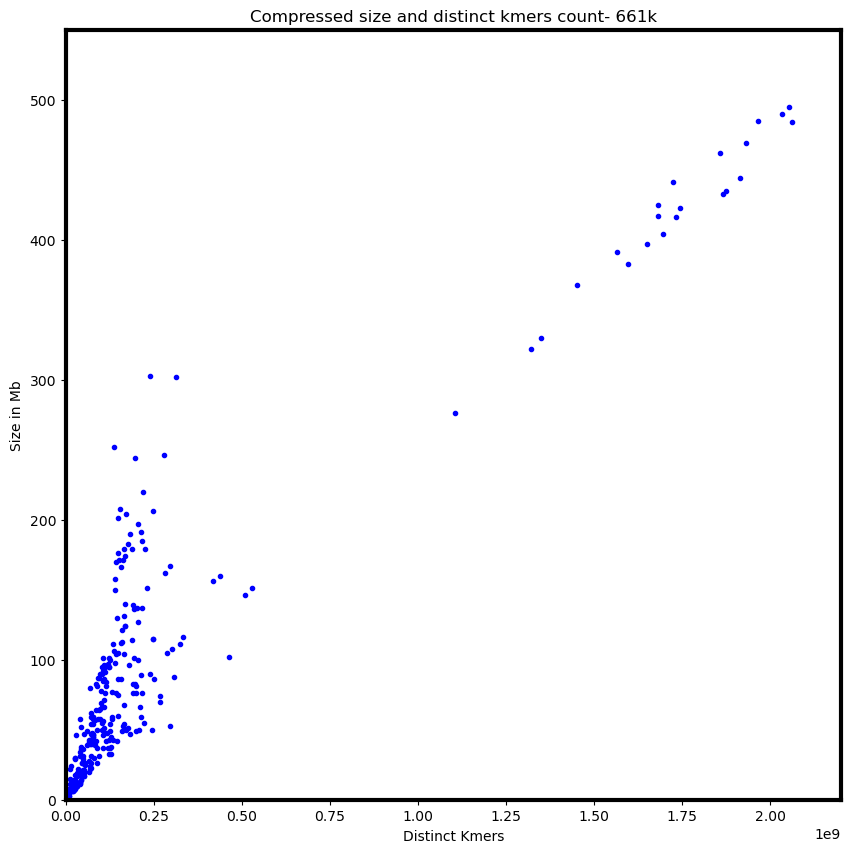

In [270]:
fig, ax = plt.subplots(figsize=(10, 10))
x = merged_df['distinct_31mers'].values
y = merged_df['size_Mb'].values

ax.set_ylabel('Size in Mb')
ax.set_xlabel('Distinct Kmers')
ax.set_title('Compressed size and distinct kmers count- 661k')
plt.xlim(0, 2200000000)
plt.ylim(0, 550)
ax.scatter(x, y, marker='.', color = 'blue')

In [271]:
simple_colors_9500 = {
    "Red": "#e6194B",
    "Green": "#3cb44b",
    "gold": "#ffe119",
    "Blue": "#4363d8",
    "darkgoldenrod": "#f58231",
    "Purple": "#911eb4",
    "Cyan": "#42d4f4",
    "Magenta": "#f032e6",
    "Lime": "#bfef45",
    "Pink": "#fabed4",
    "Teal": "#469990",
    "Lavender": "#dcbeff",
    "Brown": "#9A6324",
    "Beige": "#fffac8",
    "Maroon": "#800000",
    "Mint": "#aaffc3",
    "Olive": "#808000",
    "Apricot": "#ffd8b1",
    "Navy": "#000075",
    "Grey": "#a9a9a9",
    "Black": "#000000",
    "White": "#ffffff",
}

selected_colors = list(simple_colors_9500.keys())[:10]

In [272]:
species_name = [name[:-4] for name in merged_df.index]
merged_df['species'] = species_name

In [273]:
merged_df

,size_Mb,distinct_31mers,species
acinetobacter_baumannii__01,113,1.593016e+08,acinetobacter_baumannii
acinetobacter_baumannii__02,42,8.656233e+07,acinetobacter_baumannii
acinetobacter_nosocomialis__01,14,4.382831e+07,acinetobacter_nosocomialis
acinetobacter_pittii__01,23,7.036319e+07,acinetobacter_pittii
actinobacillus_pleuropneumoniae__01,6,1.584197e+07,actinobacillus_pleuropneumoniae
...,...,...,...
wolbachia_endosymbiont_of_drosophila_melanogaster__01,1,1.312887e+06,wolbachia_endosymbiont_of_drosophila_melanogaster
xanthomonas_oryzae__01,21,4.748350e+07,xanthomonas_oryzae
yersinia_enterocolitica__01,37,1.043645e+08,yersinia_enterocolitica
yersinia_pestis__01,8,8.080754e+06,yersinia_pestis


In [274]:
df_group_by_species = merged_df.groupby('species').sum()
df_group_by_species = df_group_by_species.sort_values(by = 'size_Mb',ascending = False)
colors = selected_colors[:10] + ['black']*(len(df_group_by_species)-10)
df_group_by_species['color'] = colors

In [275]:
df_group_by_species.head(15)

,size_Mb,distinct_31mers,color
species,,,
dustbin,9190,3.783392e+10,Red
salmonella_enterica,4816,6.541256e+09,Green
escherichia_coli,4404,4.062612e+09,gold
mycobacterium_tuberculosis,1190,3.229292e+09,Blue
klebsiella_pneumoniae,724,7.521528e+08,darkgoldenrod
streptococcus_pneumoniae,722,9.723605e+08,Purple
staphylococcus_aureus,633,1.283606e+09,Cyan
clostridioides_difficile,377,7.369809e+08,Magenta
pseudomonas_aeruginosa,343,4.613913e+08,Lime


In [276]:
colors_dict = dict(map(lambda i,j : (i,j) , df_group_by_species.index,colors))
merged_df['colors'] = merged_df['species'].map(colors_dict)
merged_df

,size_Mb,distinct_31mers,species,colors
acinetobacter_baumannii__01,113,1.593016e+08,acinetobacter_baumannii,black
acinetobacter_baumannii__02,42,8.656233e+07,acinetobacter_baumannii,black
acinetobacter_nosocomialis__01,14,4.382831e+07,acinetobacter_nosocomialis,black
acinetobacter_pittii__01,23,7.036319e+07,acinetobacter_pittii,black
actinobacillus_pleuropneumoniae__01,6,1.584197e+07,actinobacillus_pleuropneumoniae,black
...,...,...,...,...
wolbachia_endosymbiont_of_drosophila_melanogaster__01,1,1.312887e+06,wolbachia_endosymbiont_of_drosophila_melanogaster,black
xanthomonas_oryzae__01,21,4.748350e+07,xanthomonas_oryzae,black
yersinia_enterocolitica__01,37,1.043645e+08,yersinia_enterocolitica,black
yersinia_pestis__01,8,8.080754e+06,yersinia_pestis,black


In [277]:
[color.lower() for color in merged_df.loc[:,'colors'].values]
list(df_group_by_species.index.values[:10]) + ['other']

['dustbin',
 'salmonella_enterica',
 'escherichia_coli',
 'mycobacterium_tuberculosis',
 'klebsiella_pneumoniae',
 'streptococcus_pneumoniae',
 'staphylococcus_aureus',
 'clostridioides_difficile',
 'pseudomonas_aeruginosa',
 'listeria_monocytogenes',
 'other']

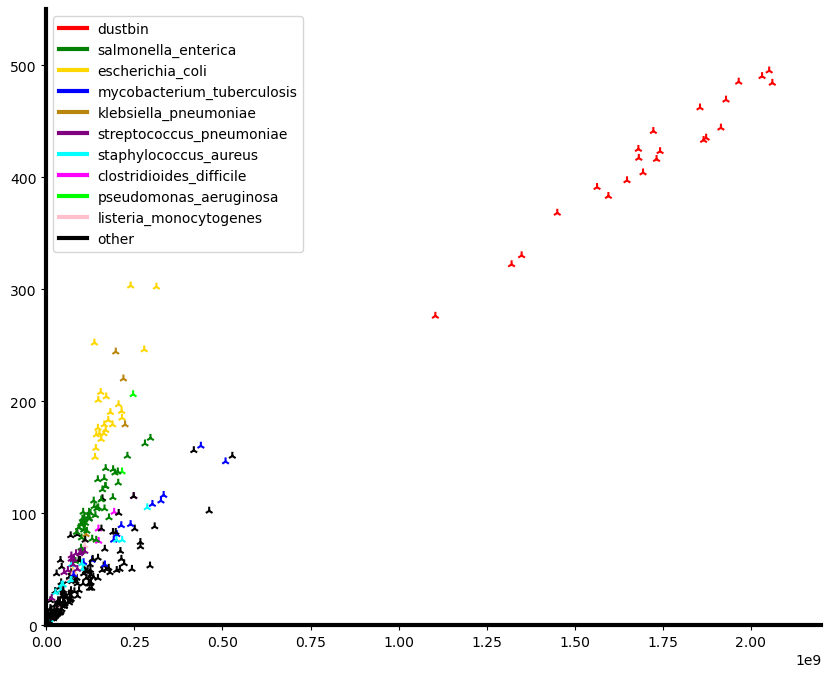

In [278]:
import matplotlib as mpl

mpl.rcParams['axes.linewidth'] = 3

fig, ax = plt.subplots(figsize=(10, 8))
x = merged_df['distinct_31mers'].values
y = merged_df['size_Mb'].values

# ax.set_ylabel('Size in Mb')
# ax.set_xlabel('Distinct Kmers')
# ax.set_title('Compressed size and distinct kmers count- 661k')
plt.xlim(0, 2200000000)
plt.ylim(0, 550)
ax.scatter(x, y, marker='2', color = merged_df['colors'].values)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)


species_colors = colors
labels = list(df_group_by_species.index.values[:10]) + ['other']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in species_colors]
ax.legend(lines,labels)

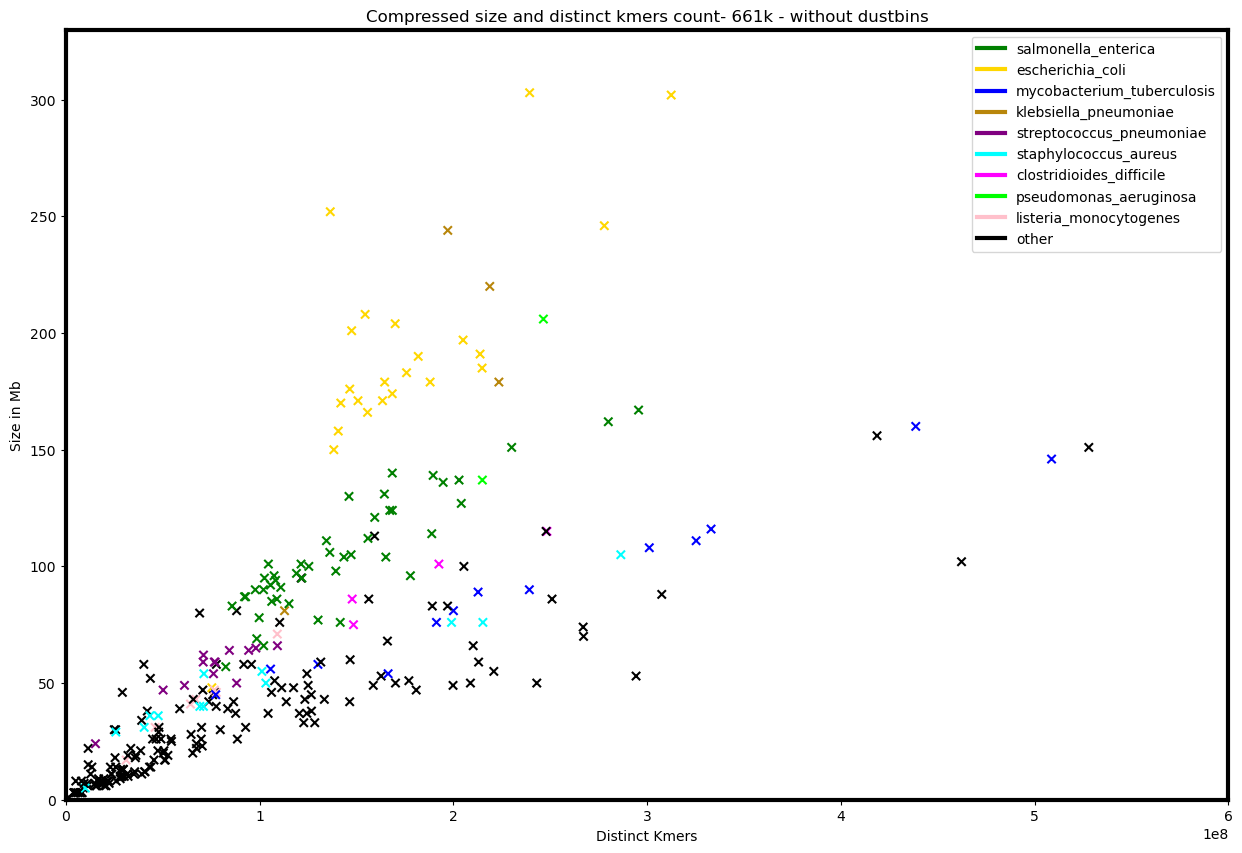

In [279]:
fig, ax = plt.subplots(figsize=(15, 10))
x = merged_df['distinct_31mers'].values
y = merged_df['size_Mb'].values

ax.set_ylabel('Size in Mb')
ax.set_xlabel('Distinct Kmers')
ax.set_title('Compressed size and distinct kmers count- 661k - without dustbins')
plt.xlim(0, 600000000)
plt.ylim(0, 330)
ax.scatter(x, y, marker='x', color = merged_df['colors'].values)

species_colors = colors
labels = list(df_group_by_species.index.values[1:10]) + ['other']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in species_colors[1:]]
ax.legend(lines,labels)

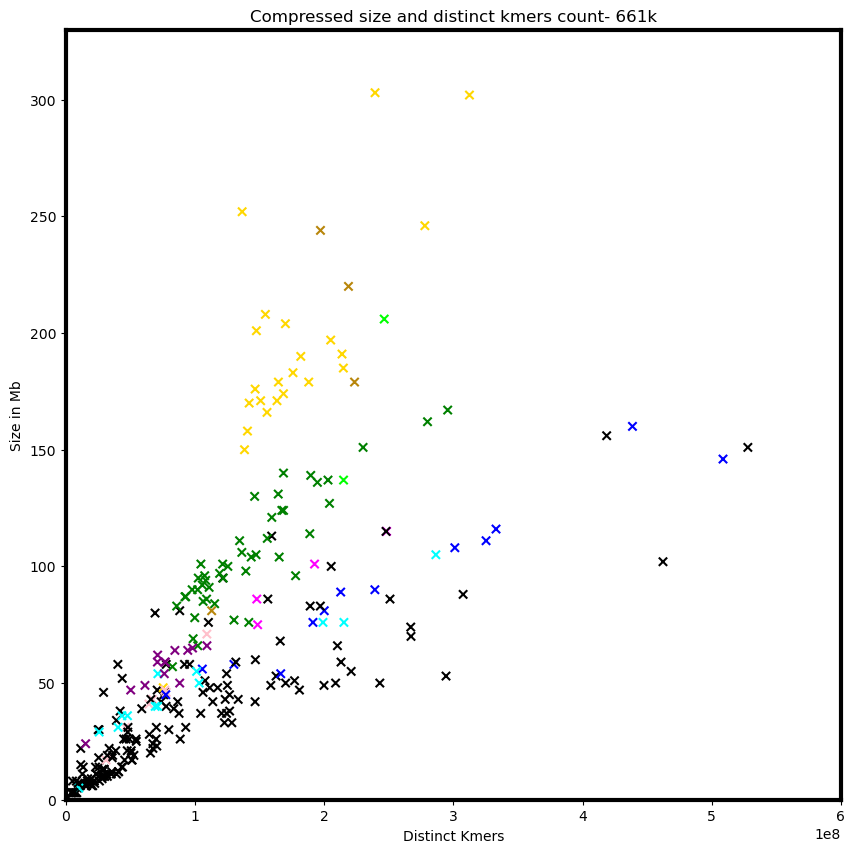

In [280]:
fig, ax = plt.subplots(figsize=(10, 10))
x = merged_df['distinct_31mers'].values
y = merged_df['size_Mb'].values

ax.set_ylabel('Size in Mb')
ax.set_xlabel('Distinct Kmers')
ax.set_title('Compressed size and distinct kmers count- 661k')
plt.xlim(0, 600000000)
plt.ylim(0, 330)
ax.scatter(x, y, marker='x', color = merged_df['colors'].values)

In [281]:
# load data 
compressed_size_batches = pd.read_csv("./data/csv/prefix_25_661k.csv",header=None, sep = "\t", 
                                      names = ['size_KB','name'], index_col = 'name')

compressed_size_batches.index = [i[31:-7] for i in compressed_size_batches.index]
compressed_size_batches = compressed_size_batches.drop('')

distinct_31mers_batches = pd.read_csv("./data/csv/prefix_25_batches_cardinality.csv", sep = ",")
distinct_31mers_batches.columns =["species","distinct_31mers"]
distinct_31mers_batches = distinct_31mers_batches.set_index("species")
distinct_31mers_batches.index = [i[12:-4] for i in distinct_31mers_batches.index]

In [282]:
distinct_31mers_batches

,distinct_31mers
clostridioides_difficile__02,4.118875e+06
klebsiella_oxytoca__01,1.456200e+07
brucella_melitensis__01,3.552513e+06
staphylococcus_aureus__12,3.925760e+06
staphylococcus_aureus__06,4.046998e+06
...,...
taylorella_equigenitalis__01,1.834104e+06
klebsiella_pneumoniae__04,1.105781e+07
mycobacterium_bovis__01,4.524962e+06
porphyromonas_gingivalis__01,2.526466e+07


In [283]:
compressed_size_batches

,size_KB
acinetobacter_baumannii__01,2896
acinetobacter_baumannii__02,5908
acinetobacter_nosocomialis__01,4828
acinetobacter_pittii__01,4132
actinobacillus_pleuropneumoniae__01,1424
...,...
wolbachia_endosymbiont_of_drosophila_melanogaster__01,684
xanthomonas_oryzae__01,4064
yersinia_enterocolitica__01,2544
yersinia_pestis__01,2716


In [284]:
merged_df = pd.merge(compressed_size_batches, distinct_31mers_batches, left_index=True, right_index=True)

In [285]:
merged_df

,size_KB,distinct_31mers
acinetobacter_baumannii__01,2896,5072200.50
acinetobacter_baumannii__02,5908,18070830.00
acinetobacter_nosocomialis__01,4828,13717602.00
acinetobacter_pittii__01,4132,9097190.00
actinobacillus_pleuropneumoniae__01,1424,3160147.25
...,...,...
wolbachia_endosymbiont_of_drosophila_melanogaster__01,684,1227460.00
xanthomonas_oryzae__01,4064,11970632.00
yersinia_enterocolitica__01,2544,4642646.50
yersinia_pestis__01,2716,4842630.50


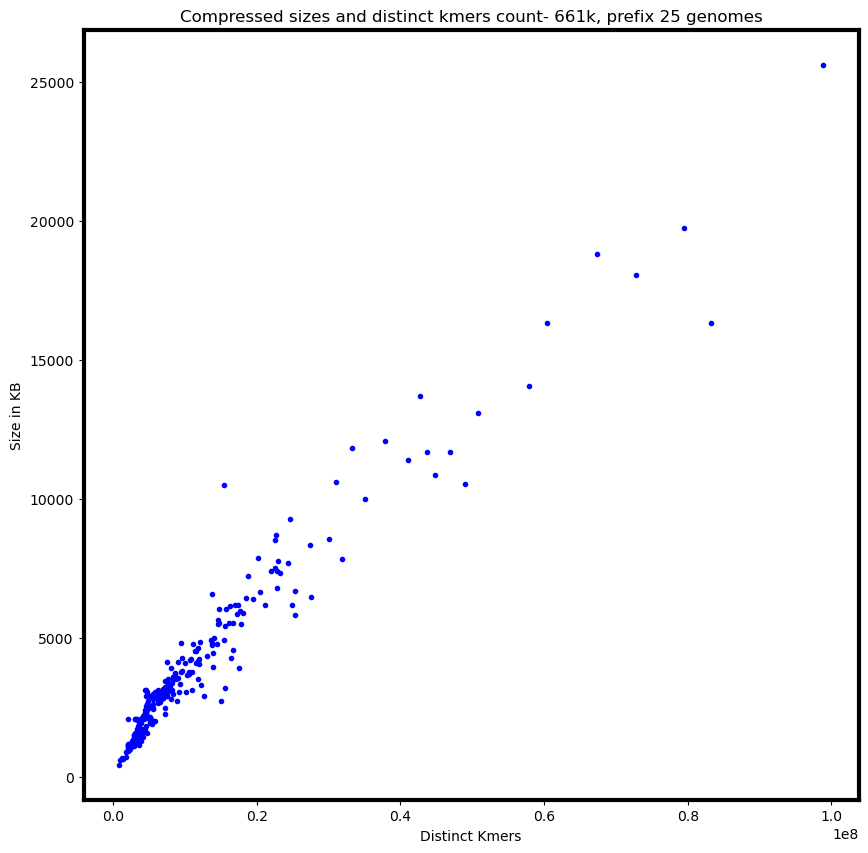

In [286]:
fig, ax = plt.subplots(figsize=(10, 10))
x = merged_df['distinct_31mers'].values
y = merged_df['size_KB'].values

ax.set_ylabel('Size in KB')
ax.set_xlabel('Distinct Kmers')
ax.set_title('Compressed sizes and distinct kmers count- 661k, prefix 25 genomes')
# plt.xlim(0, 2200000000)
# plt.ylim(0, 550)
ax.scatter(x, y, marker='.', color = 'blue')

In [287]:
species_name = [name[:-4] for name in merged_df.index]
merged_df['species'] = species_name

In [288]:
merged_df['colors'] = merged_df['species'].map(colors_dict)
merged_df

,size_KB,distinct_31mers,species,colors
acinetobacter_baumannii__01,2896,5072200.50,acinetobacter_baumannii,black
acinetobacter_baumannii__02,5908,18070830.00,acinetobacter_baumannii,black
acinetobacter_nosocomialis__01,4828,13717602.00,acinetobacter_nosocomialis,black
acinetobacter_pittii__01,4132,9097190.00,acinetobacter_pittii,black
actinobacillus_pleuropneumoniae__01,1424,3160147.25,actinobacillus_pleuropneumoniae,black
...,...,...,...,...
wolbachia_endosymbiont_of_drosophila_melanogaster__01,684,1227460.00,wolbachia_endosymbiont_of_drosophila_melanogaster,black
xanthomonas_oryzae__01,4064,11970632.00,xanthomonas_oryzae,black
yersinia_enterocolitica__01,2544,4642646.50,yersinia_enterocolitica,black
yersinia_pestis__01,2716,4842630.50,yersinia_pestis,black


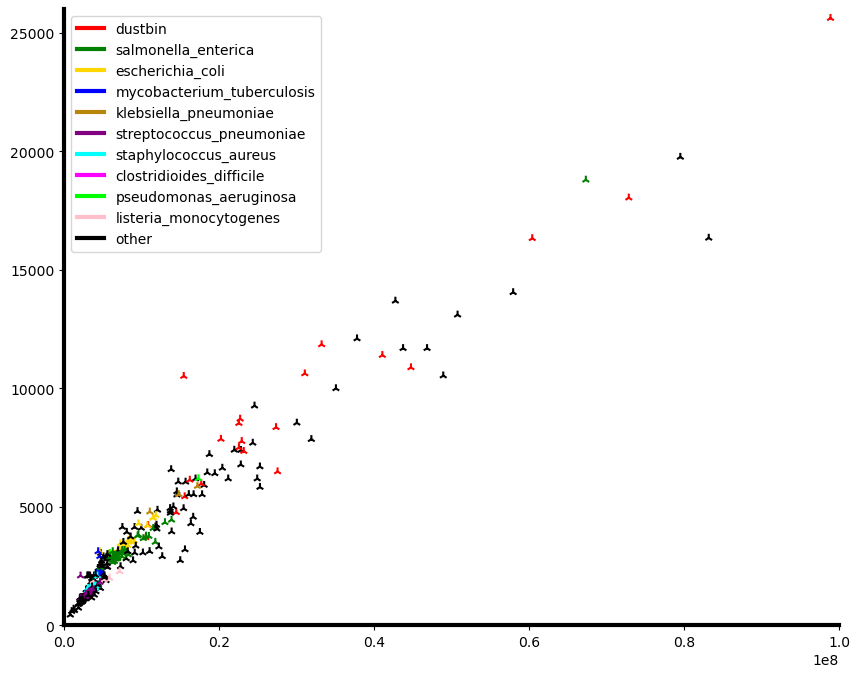

In [289]:
mpl.rcParams['axes.linewidth'] = 3

fig, ax = plt.subplots(figsize=(10, 8))
x = merged_df['distinct_31mers'].values
y = merged_df['size_KB'].values

# ax.set_ylabel('Size in Mb')
# ax.set_xlabel('Distinct Kmers')
# ax.set_title('Compressed size and distinct kmers count- 661k')
plt.xlim(0, 100000000)
plt.ylim(0, 26000)
ax.scatter(x, y, marker='2', color = merged_df['colors'].values)

ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)


species_colors = colors
labels = list(df_group_by_species.index.values[:10]) + ['other']
lines = [Line2D([0], [0], color=c, linewidth=3, linestyle='-') for c in species_colors]
ax.legend(lines,labels)

In [245]:
# load data 
compressed_size_batches = pd.read_csv("./data/csv/batches_100x50.csv",header=None, sep = "\t", 
                                      names = ['size_KB','name'], index_col = 'name')

compressed_size_batches.index = [i[14:-7] for i in compressed_size_batches.index]
compressed_size_batches = compressed_size_batches.drop('inal')

distinct_31mers_batches = pd.read_csv("./data/csv/batches_100x50_batches_cardinality.csv", sep = ",")
distinct_31mers_batches.columns =["species","distinct_31mers"]
distinct_31mers_batches = distinct_31mers_batches.set_index("species")
distinct_31mers_batches.index = [i[7:-4] for i in distinct_31mers_batches.index]



In [246]:
compressed_size_batches

,size_KB
01,43032
02,44800
03,50932
04,44300
05,44976
...,...
95,49848
96,41472
97,38976
98,47468


In [247]:
distinct_31mers_batches

,distinct_31mers
38,231438960.0
10,185470080.0
04,209832816.0
05,194972304.0
11,193709616.0
...,...
20,214252880.0
08,214591648.0
09,202086848.0
21,211218912.0


In [248]:
merged_df = pd.merge(compressed_size_batches, distinct_31mers_batches, left_index=True, right_index=True)

KeyError: 'distinct_31mers'

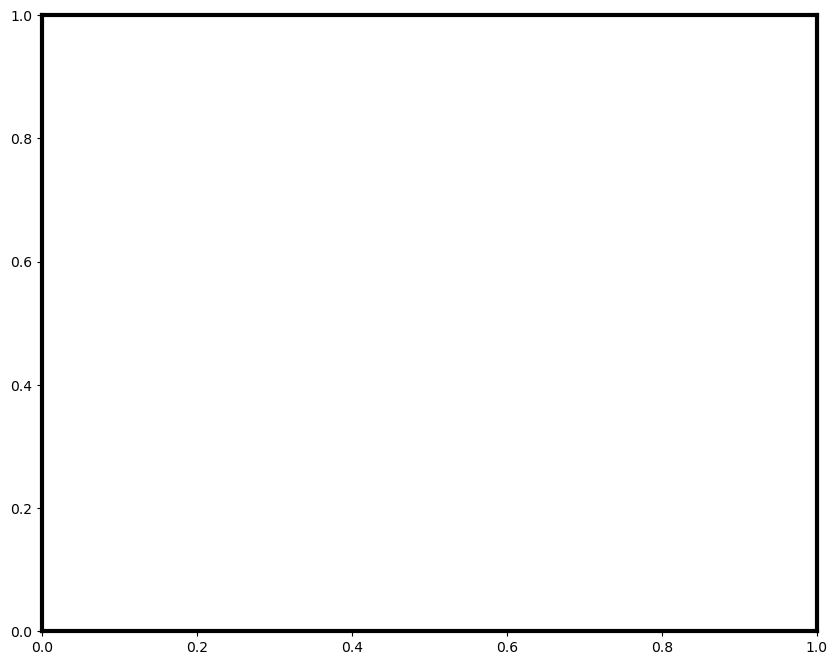

In [464]:
fig, ax = plt.subplots(figsize=(10, 8))
x = merged_df['distinct_31mers'].values
y = merged_df['size_KB'].values

# ax.set_ylabel('Size in KB')
# ax.set_xlabel('Distinct Kmers')
# ax.set_title('Compressed sizes and distinct kmers count- 661k, prefix 25 genomes')
plt.xlim(0, 250000000)
plt.ylim(0, 60000)
ax.scatter(x, y, marker='2', color = 'black')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

In [236]:
# load data 
compressed_size_batches = pd.read_csv("./data/csv/salmon_100x50.csv",header=None, sep = "\t", 
                                      names = ['size_KB','name'], index_col = 'name')

compressed_size_batches.index = [i[25:-7] for i in compressed_size_batches.index]
# compressed_size_batches = compressed_size_batches.drop('inal')

distinct_31mers_batches = pd.read_csv("./data/csv/salmon_100x50_batches_cardinality.csv", sep = ",")
distinct_31mers_batches.columns =["species","distinct_31mers"]
distinct_31mers_batches = distinct_31mers_batches.set_index("species")
distinct_31mers_batches.index = [i[6:-4] for i in distinct_31mers_batches.index]

In [237]:
compressed_size_batches

,size_KB
0,6164
1,7212
10,7456
11,7204
12,6180
...,...
95,6096
96,7208
97,6180
98,7404


In [238]:
distinct_31mers_batches

,distinct_31mers
12,18485308.0
13,16729803.0
11,21557276.0
39,20460690.0
38,18362748.0
...,...
36,20065454.0
22,19925088.0
23,24516492.0
37,19885160.0


In [239]:
merged_df = pd.merge(compressed_size_batches, distinct_31mers_batches, left_index=True, right_index=True)

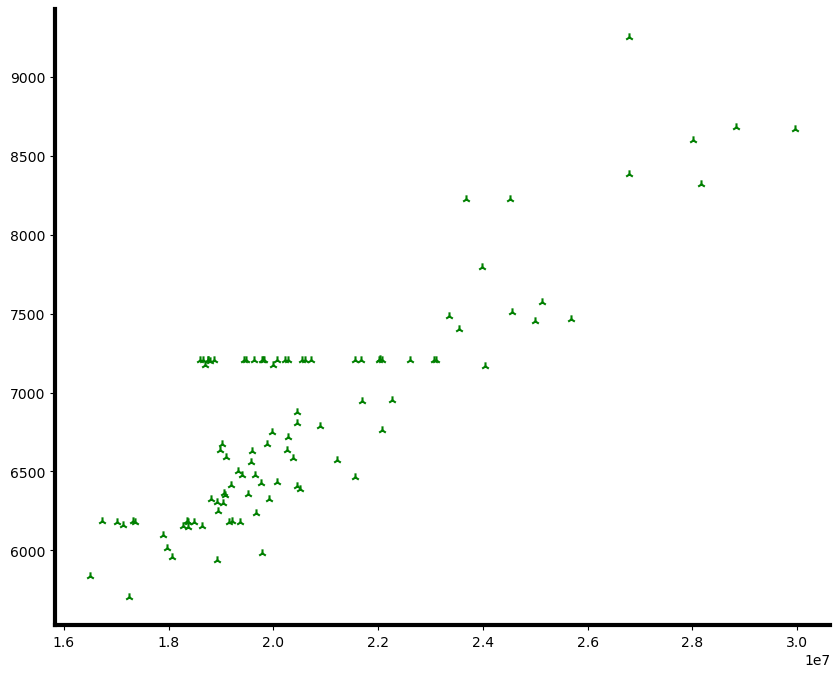

In [241]:
fig, ax = plt.subplots(figsize=(10, 8))
x = merged_df['distinct_31mers'].values
y = merged_df['size_KB'].values

# ax.set_ylabel('Size in KB')
# ax.set_xlabel('Distinct Kmers')
# ax.set_title('Compressed sizes and distinct kmers count- 661k, prefix 25 genomes')
# plt.xlim(0, 250000000)
# plt.ylim(0, 60000)
ax.scatter(x, y, marker='2', color = 'green')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

In [256]:
# load data 
compressed_size_batches = pd.read_csv("./data/csv/ecoli_100x50.csv",header=None, sep = "\t", 
                                      names = ['size_KB','name'], index_col = 'name')

compressed_size_batches.index = [i[25:-7] for i in compressed_size_batches.index]
# compressed_size_batches = compressed_size_batches.drop('inal')

distinct_31mers_batches = pd.read_csv("./data/csv/ecoli_100x50_batches_cardinality.csv", sep = ",")
distinct_31mers_batches.columns =["species","distinct_31mers"]
distinct_31mers_batches = distinct_31mers_batches.set_index("species")
distinct_31mers_batches.index = [i[6:-4] for i in distinct_31mers_batches.index]

merged_df = pd.merge(compressed_size_batches, distinct_31mers_batches, left_index=True, right_index=True)

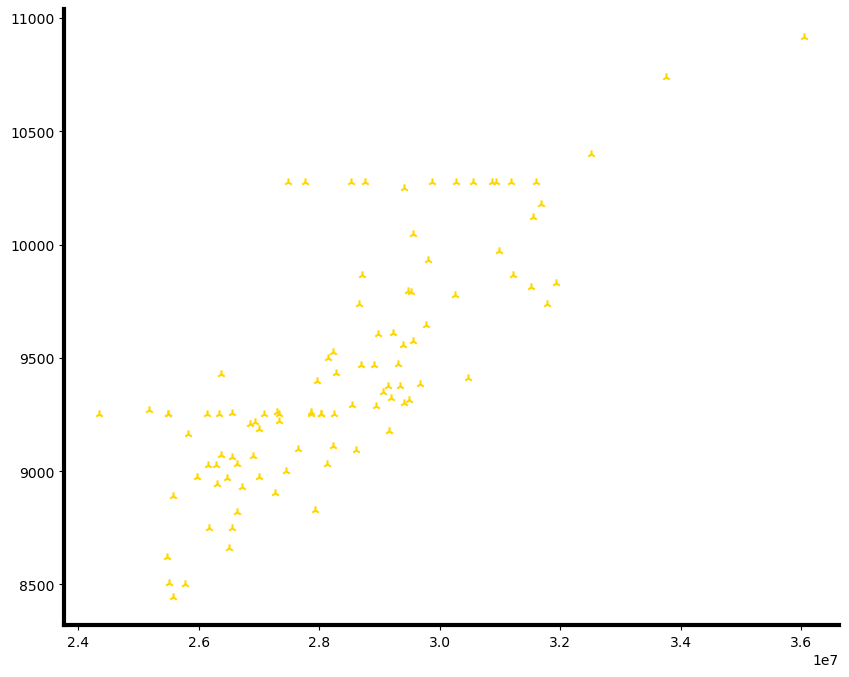

In [259]:
fig, ax = plt.subplots(figsize=(10, 8))
x = merged_df['distinct_31mers'].values
y = merged_df['size_KB'].values

# ax.set_ylabel('Size in KB')
# ax.set_xlabel('Distinct Kmers')
# ax.set_title('Compressed sizes and distinct kmers count- 661k, prefix 25 genomes')
# plt.xlim(0, 250000000)
# plt.ylim(0, 60000)
ax.scatter(x, y, marker='2', color = 'Gold')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

In [290]:
# load data 
compressed_size_batches = pd.read_csv("./data/csv/aureus_100x50.csv",header=None, sep = "\t", 
                                      names = ['size_KB','name'], index_col = 'name')

compressed_size_batches.index = [i[25:-7] for i in compressed_size_batches.index]
# compressed_size_batches = compressed_size_batches.drop('inal')

distinct_31mers_batches = pd.read_csv("./data/csv/aureus_100x50_batches_cardinality.csv", sep = ",")
distinct_31mers_batches.columns =["species","distinct_31mers"]
distinct_31mers_batches = distinct_31mers_batches.set_index("species")
distinct_31mers_batches.index = [i[6:-4] for i in distinct_31mers_batches.index]

merged_df = pd.merge(compressed_size_batches, distinct_31mers_batches, left_index=True, right_index=True)

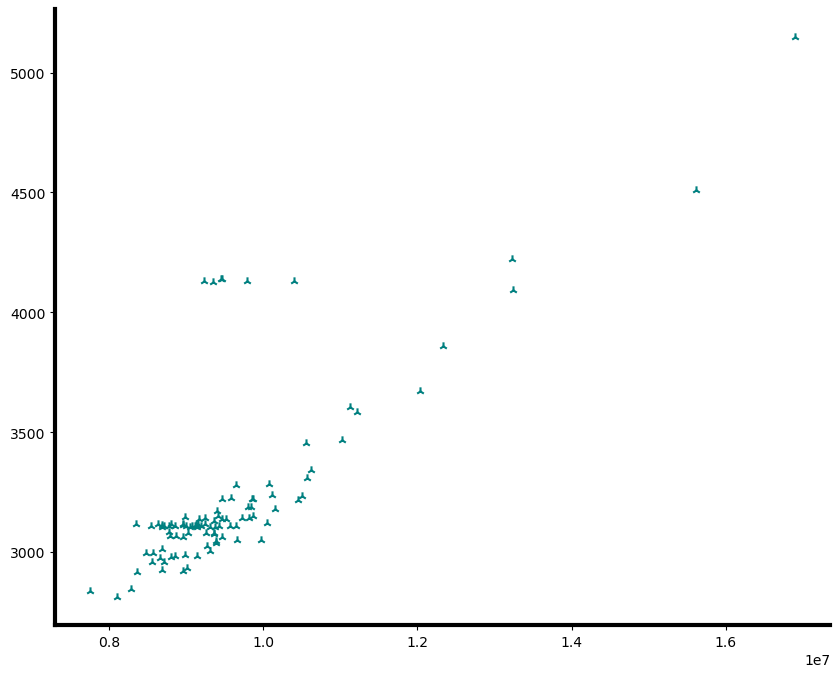

In [293]:
fig, ax = plt.subplots(figsize=(10, 8))
x = merged_df['distinct_31mers'].values
y = merged_df['size_KB'].values

# ax.set_ylabel('Size in KB')
# ax.set_xlabel('Distinct Kmers')
# ax.set_title('Compressed sizes and distinct kmers count- 661k, prefix 25 genomes')
# plt.xlim(0, 250000000)
# plt.ylim(0, 60000)
ax.scatter(x, y, marker='2', color = 'teal')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

In [260]:
# load data 
compressed_size_batches = pd.read_csv("./data/csv/tuber_100x50.csv",header=None, sep = "\t", 
                                      names = ['size_KB','name'], index_col = 'name')

compressed_size_batches.index = [i[25:-7] for i in compressed_size_batches.index]
# compressed_size_batches = compressed_size_batches.drop('inal')

distinct_31mers_batches = pd.read_csv("./data/csv/tuber_100x50_batches_cardinality.csv", sep = ",")
distinct_31mers_batches.columns =["species","distinct_31mers"]
distinct_31mers_batches = distinct_31mers_batches.set_index("species")
distinct_31mers_batches.index = [i[6:-4] for i in distinct_31mers_batches.index]

merged_df = pd.merge(compressed_size_batches, distinct_31mers_batches, left_index=True, right_index=True)

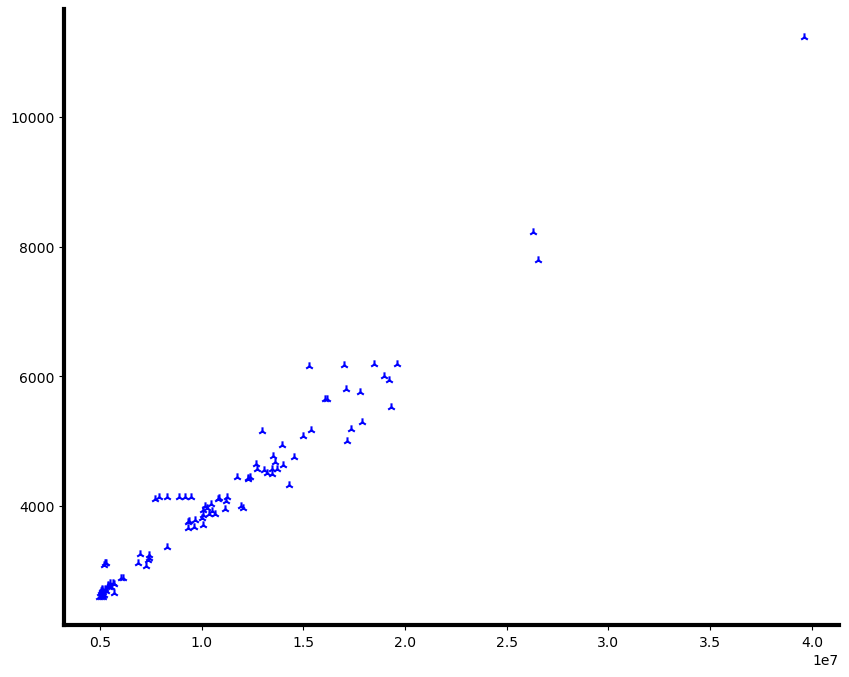

In [261]:
fig, ax = plt.subplots(figsize=(10, 8))
x = merged_df['distinct_31mers'].values
y = merged_df['size_KB'].values

# ax.set_ylabel('Size in KB')
# ax.set_xlabel('Distinct Kmers')
# ax.set_title('Compressed sizes and distinct kmers count- 661k, prefix 25 genomes')
# plt.xlim(0, 250000000)
# plt.ylim(0, 60000)
ax.scatter(x, y, marker='2', color = 'blue')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

In [294]:
# load data 
compressed_size_batches = pd.read_csv("./data/csv/pneu_100x50.csv",header=None, sep = "\t", 
                                      names = ['size_KB','name'], index_col = 'name')

compressed_size_batches.index = [i[25:-7] for i in compressed_size_batches.index]
# compressed_size_batches = compressed_size_batches.drop('inal')

distinct_31mers_batches = pd.read_csv("./data/csv/pneu_100x50_batches_cardinality.csv", sep = ",")
distinct_31mers_batches.columns =["species","distinct_31mers"]
distinct_31mers_batches = distinct_31mers_batches.set_index("species")
distinct_31mers_batches.index = [i[6:-4] for i in distinct_31mers_batches.index]

merged_df = pd.merge(compressed_size_batches, distinct_31mers_batches, left_index=True, right_index=True)

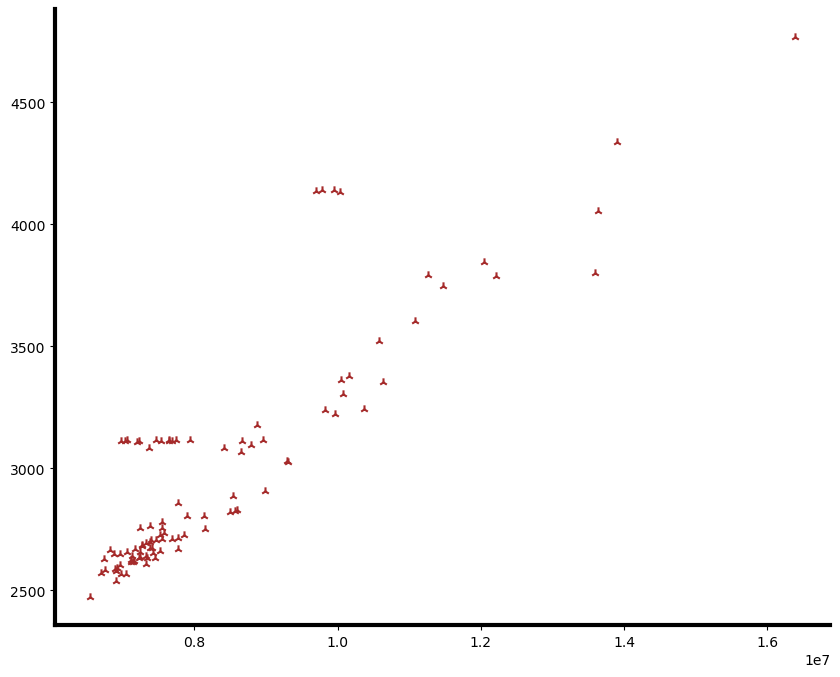

In [295]:
fig, ax = plt.subplots(figsize=(10, 8))
x = merged_df['distinct_31mers'].values
y = merged_df['size_KB'].values

# ax.set_ylabel('Size in KB')
# ax.set_xlabel('Distinct Kmers')
# ax.set_title('Compressed sizes and distinct kmers count- 661k, prefix 25 genomes')
# plt.xlim(0, 250000000)
# plt.ylim(0, 60000)
ax.scatter(x, y, marker='2', color = 'brown')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)

In [324]:
########################################
########################################

In [407]:
import os
import glob
def process_bin_output(input_file, output_dir):
    os.makedirs(output_dir, exist_ok=True)
    
    cardinalities = []
    
    with open(input_file, "r") as infile:
        for line in infile:
            parts = line.strip().split("; Cardinality: ")
            if len(parts) != 2:
                continue  # Skip malformed lines
            
            bin_part, cardinality = parts

            bin_name, genomes = bin_part.split(":")
            bin_index = bin_name.replace("Bin ", "").strip()
            genome_list = genomes.split(",")
            
            # Write genomes to bin_{i}.txt
            if int(bin_index) <10:
                bin_file = os.path.join(output_dir, f"bin_0{bin_index}.txt")
            else:
                bin_file = os.path.join(output_dir, f"bin_{bin_index}.txt")
            with open(bin_file, "w") as bf:
                bf.write("\n".join(genome_list) + "\n")
            
            # Collect cardinalities
            cardinalities.append(cardinality)
    
    # Write bin cardinalities to bin_cardinalities.txt
    cardinality_file = os.path.join(output_dir, "bin_cardinalities.txt")
    with open(cardinality_file, "w") as cf:
        cf.write("\n".join(cardinalities) + "\n")

def read_bins(bin_dir="output"):
    """
    Reads bin_{i}.txt files and bin_cardinalities.txt, returning lists of genome bins and cardinalities.

    :param bin_dir: Directory containing the bin files.
    :return: (bins, cardinalities) where:
             - bins is a list of lists, each sublist contains genome names for a bin.
             - cardinalities is a list of integers representing the cardinality of each bin.
    """
    # Read bin files
    bin_files = sorted(glob.glob(os.path.join(bin_dir, "bin_*.txt")))  # Sorted to maintain order
    bins = []
    
    for bin_file in bin_files:
        with open(bin_file, "r") as f:
            genomes = [line.strip() for line in f if line.strip()]  # Remove empty lines
            bins.append(genomes)

    # Read cardinalities
    cardinalities_file = os.path.join(bin_dir, "bin_cardinalities.txt")
    cardinalities = []
    
    if os.path.exists(cardinalities_file):
        with open(cardinalities_file, "r") as f:
            cardinalities = [float(line.strip()) for line in f if line.strip()]  # Convert to int

    return bins, cardinalities

In [455]:
process_bin_output("data/pneumoniae_mix_bin_assignment.txt", "output/pneumoniae_mix_bin_assignment")
bins, cardinalities = read_bins('output/pneumoniae_mix_bin_assignment/')

In [456]:
nb_of_genomes = []
cards = []
for i, (genomes, card) in enumerate(zip(bins, cardinalities)):
    nb_of_genomes = nb_of_genomes + [len(genomes)]
    cards = cards + [card]

In [457]:
nb_of_genomes

[63,
 109,
 33,
 13,
 81,
 67,
 90,
 23,
 54,
 49,
 38,
 66,
 39,
 77,
 3,
 54,
 4,
 35,
 30,
 36,
 28,
 63,
 58,
 16,
 57,
 91,
 39,
 6,
 28,
 36,
 39,
 29,
 53,
 60,
 48,
 20,
 29,
 18,
 63,
 51,
 24,
 10,
 26,
 21,
 6,
 46,
 13,
 61,
 32,
 14,
 39,
 88,
 13,
 18,
 54,
 6,
 45,
 6,
 31,
 70,
 10,
 69,
 21,
 52,
 40,
 45,
 53,
 58,
 35,
 36,
 75,
 23,
 38,
 30,
 25,
 31,
 68,
 77,
 108,
 34,
 61,
 72,
 65,
 25,
 41,
 59,
 23,
 154,
 45,
 57,
 107,
 19,
 14,
 68,
 143,
 7,
 29,
 89,
 38,
 11,
 47,
 45,
 99,
 74,
 82,
 69,
 44,
 66]

In [458]:
cards

[19865506.0,
 19817046.0,
 19908468.0,
 19991982.0,
 19820284.0,
 19858298.0,
 19830782.0,
 19908776.0,
 19955450.0,
 19818088.0,
 19827940.0,
 19843420.0,
 19829686.0,
 19982568.0,
 19917652.0,
 19970090.0,
 19854494.0,
 19998446.0,
 19834136.0,
 19929808.0,
 19917526.0,
 19893446.0,
 19806900.0,
 19902988.0,
 19815226.0,
 19845204.0,
 19862288.0,
 19898354.0,
 19891172.0,
 19895252.0,
 19831734.0,
 19999816.0,
 19813174.0,
 19847222.0,
 19801870.0,
 19987852.0,
 19832762.0,
 19864110.0,
 19928356.0,
 19874906.0,
 19962220.0,
 19932354.0,
 19862738.0,
 19840272.0,
 19855778.0,
 19894700.0,
 19973730.0,
 19975768.0,
 19857278.0,
 19800824.0,
 19914538.0,
 19915090.0,
 19981622.0,
 19882664.0,
 19923942.0,
 19857534.0,
 19982588.0,
 19802998.0,
 19937794.0,
 19991038.0,
 19947490.0,
 19918012.0,
 19944612.0,
 19873920.0,
 19990014.0,
 19991770.0,
 19965546.0,
 19894440.0,
 19978500.0,
 19938720.0,
 19837114.0,
 19835512.0,
 19994196.0,
 19966194.0,
 19874468.0,
 19947552.0,
 19969882.0,

In [459]:
# load data 
compressed_size_batches = pd.read_csv("./data/csv/pneu_binning.csv",header=None, sep = "\t", 
                                      names = ['size_KB','name'], index_col = 'name')

In [460]:
compressed_size_batches.head()

,size_KB
name,
./phylo_order_tree_bin0.tar.xz,8656
./phylo_order_tree_bin1.tar.xz,8828
./phylo_order_tree_bin10.tar.xz,7076
./phylo_order_tree_bin100.tar.xz,7384
./phylo_order_tree_bin101.tar.xz,6856


In [461]:
compressed_size_batches.index = [int(name[22:-7]) for name in compressed_size_batches.index]

In [462]:
compressed_size_batches = compressed_size_batches.sort_index()

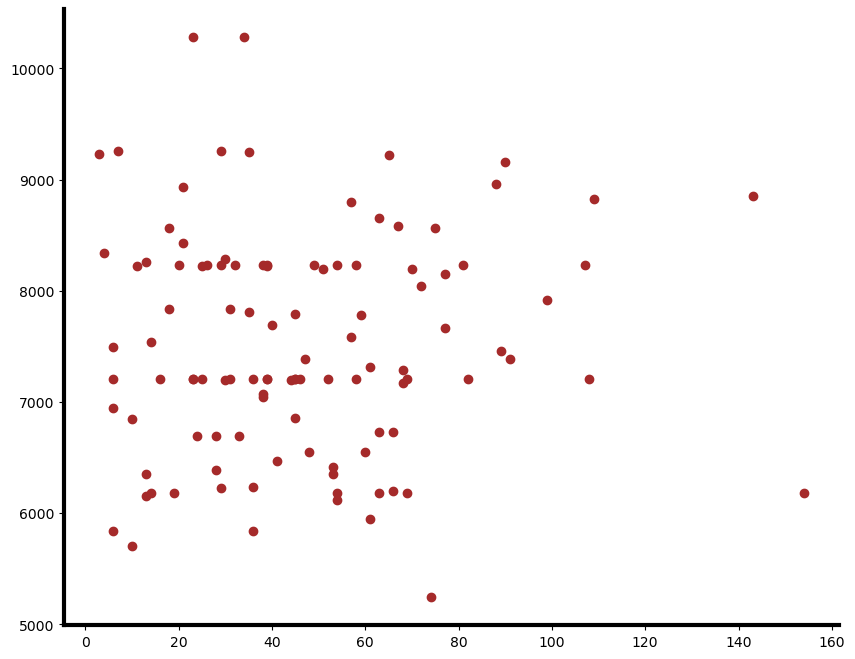

In [463]:
fig, ax = plt.subplots(figsize=(10, 8))
x = nb_of_genomes[:]
y = compressed_size_batches['size_KB'].values

# ax.set_ylabel('Size in KB')
# ax.set_xlabel('Distinct Kmers')
# ax.set_title('Compressed sizes and distinct kmers count- 661k, prefix 25 genomes')
# plt.xlim(0, 250000000)
# plt.ylim(0, 60000)
ax.scatter(x, y, marker='o', color = 'brown')
ax.spines['top'].set_visible(False)
ax.spines['right'].set_visible(False)
ax.spines['bottom'].set_visible(True)
ax.spines['left'].set_visible(True)